## Multiple Linear Regression (MLR). 
### <br> States example

metro_res -  % population which live in capital distict
<br>white  - % white population
<br>hs_grad  - % with avarage aducation
<br>poverty - % poverty
<br>famale_house - % woman doesn't work

In [11]:
from pylab import *  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import statsmodels.formula.api as smf

In [12]:
data = pd.read_csv("C:\\Users\\Asus\\tutorial_env\\imp_files\\states.csv")

In [37]:
data.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


In [14]:
lm = smf.ols(formula='poverty ~ metro_res + hs_grad', data=data).fit()

In [15]:
lm.params

Intercept    67.330105
metro_res    -0.038704
hs_grad      -0.618343
dtype: float64

In [6]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     35.14
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           3.98e-10
Time:                        19:28:50   Log-Likelihood:                -106.55
No. Observations:                  51   AIC:                             219.1
Df Residuals:                      48   BIC:                             224.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     67.3301      6.698     10.052      0.000      53.863      80.797
metro_res     -0.0387      0.019     -2.074      0.043      -0.076      -0.001
hs_grad       -0.6183      0.076     -8.084      0.000      -0.772      -0.465
==============================================================================
Omnibus:                        9.730   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.163
Skew:                           0.909   Prob(JB):                       0.0102
Kurtosis:                       4.005   Cond. No.                     2.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

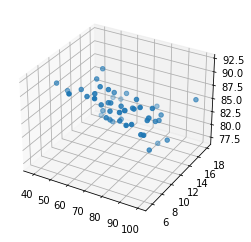

In [47]:
import pandas as pd 
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xs=data['metro_res'], ys=data['poverty'], zs=data['hs_grad'])

In [48]:
data.describe()

,metro_res,white,hs_grad,poverty,female_house
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,72.249020,81.719608,86.011765,11.349020,11.633333
std,15.275894,13.897223,3.725998,3.099185,2.356155
min,38.200000,25.900000,77.200000,5.600000,7.800000
25%,60.800000,76.800000,83.300000,9.250000,9.550000
50%,71.600000,85.400000,86.900000,10.600000,11.800000
75%,86.800000,90.250000,88.700000,13.400000,12.650000
max,100.000000,97.100000,92.100000,18.000000,18.900000


C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


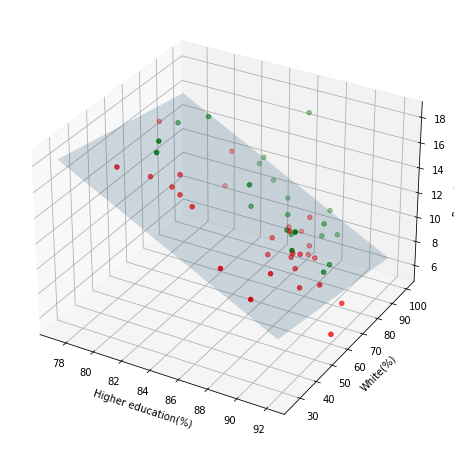

In [52]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas as pd, numpy as np

def f(x, y):
    return lm.params.Intercept + lm.params.hs_grad * x + lm.params.metro_res * y

# инициализируем параметры модели
X = data[['white', 'hs_grad']]
y = data['poverty']
#reg = LinearRegression().fit(X, y)
lm = smf.ols(formula='poverty ~ metro_res + hs_grad', data=data).fit()

# зададим масштаб и подписи осей графика
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.set_xlabel('Higher education(%)')
ax.set_ylabel('White(%)')
ax.set_zlabel('Poverty(%)')

# выведем плоскость для нашей модели
d1, d2 = list(), list()
for x in np.linspace(min(data.white), max(data.white), 100):
    for y in np.linspace(min(data.hs_grad), max(data.hs_grad), 100):
        d1.append(x)
        d2.append(y)
d1, d2 = np.array(d1).reshape(-1, 1), np.array(d2).reshape(-1, 1)
p = reg.predict(np.concatenate([d1, d2], axis=1))
ax.plot_trisurf(d2.ravel(), d1.ravel(), p.ravel(), alpha=0.2)

# выведем точки над плоскостью нашей модели
data_above_serf = data[data.poverty >= f(data.hs_grad, data.metro_res)]
ax.scatter(data_above_serf.hs_grad, data_above_serf.metro_res, data_above_serf.poverty, c='g', marker='o')

# выведем точки под плоскостью нашей модели
data_below_serf = data[data.poverty < f(data.hs_grad, data.metro_res)]
ax.scatter(data_below_serf.hs_grad, data_below_serf.metro_res, data_below_serf.poverty, c='r', marker='o')

plt.show()

**Correlation matrix**

C:\Users\Asus\AppData\Local\Temp\ipykernel_12708\510150037.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True , square=True, cmap='coolwarm' )


<AxesSubplot: >

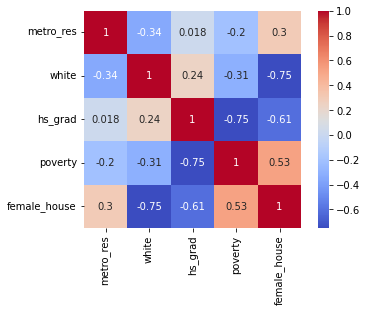

In [27]:
import seaborn as sns
sns.heatmap(data.corr(), annot = True , square=True, cmap='coolwarm' )

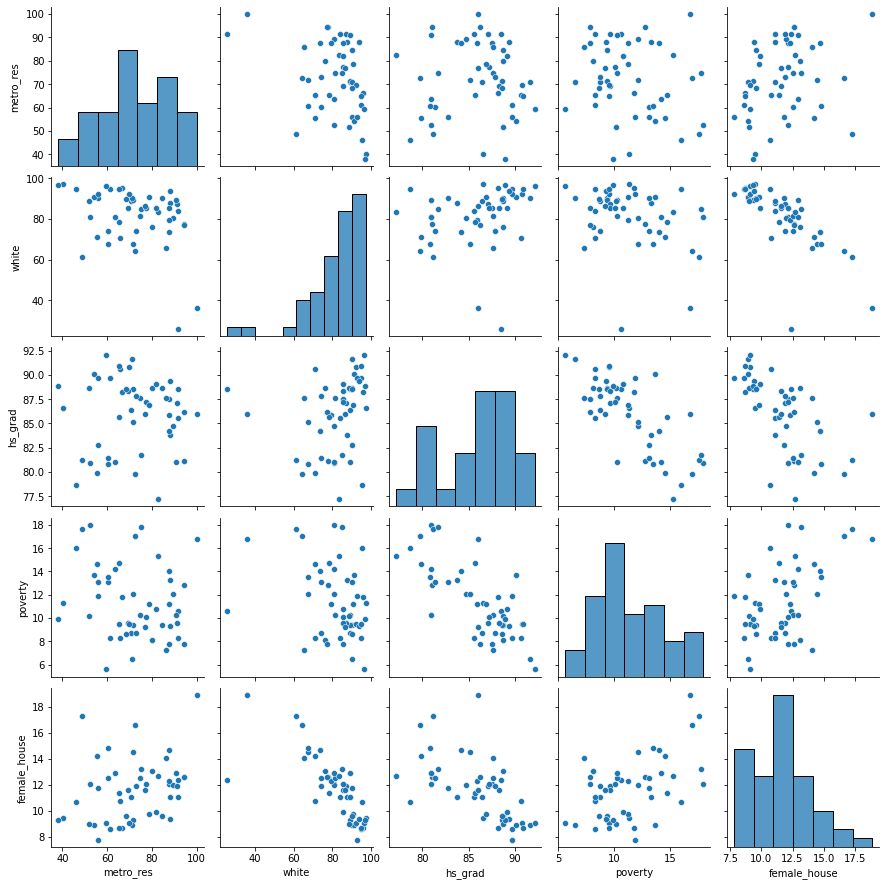

In [28]:
# scatter pairplot for each parametr
sns.pairplot(data)
plt.show()

**Scatter pairplot with correlation coefficient**
<br>Same result  as above with another plot

C:\Users\Asus\AppData\Local\Temp\ipykernel_12708\2860980468.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr().values


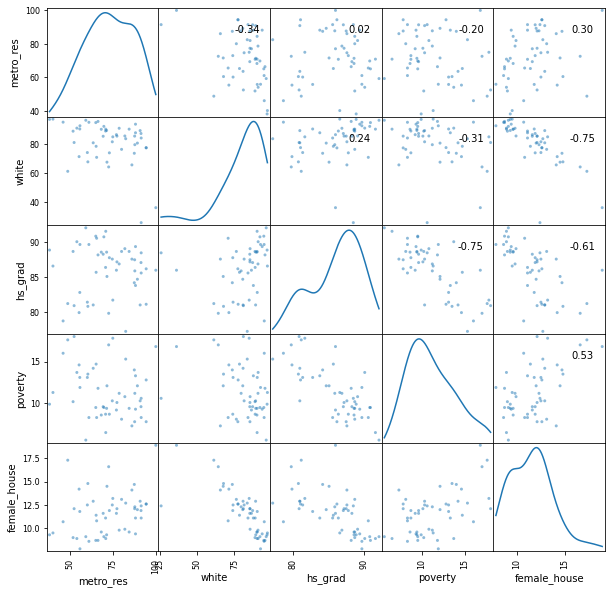

In [36]:
axes = pd.plotting.scatter_matrix(data, figsize=(10,10), diagonal='kde', grid=True)
corr = data.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.2f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()